# Mosquito Detection Tutorial

This notebook demonstrates how to use the CulicidaeLab library for detecting mosquitoes in images.

In [1]:
from culicidaelab.core.settings import get_settings
from culicidaelab.predictors.detector import MosquitoDetector
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

c:\Users\lenova\CascadeProjects\culicidaelab\.venv\Lib\site-packages\pydantic\_internal\_fields.py:132: UserWarning: Field "model_path" in PredictorConfig has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
c:\Users\lenova\CascadeProjects\culicidaelab\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Initialize Settings and Load Model

First, we'll get the settings instance which will handle model weights and configurations.

In [2]:
# Get settings instance
settings = get_settings()
settings.list_model_types()

['classifier', 'detector', 'segmenter']

In [3]:
model_config = settings.get_config("predictors.detector")
model_path = settings.get_model_weights("detector")

In [ ]:
# Initialize detector with correct parameters
detector = MosquitoDetector(
        settings=settings,
        load_model=True
        )

Weights file found at: C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\detection\culico-net-det-v1-nano.pt
C:\Users\lenova\AppData\Local\culicidaelab\culicidaelab\models\weights\detection\culico-net-det-v1-nano.pt
cpu


## 2. Load and Process an Image

Now let's load a test image and run detection on it.


0: 448x640 1 aegypti, 241.9ms
Speed: 3.0ms preprocess, 241.9ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


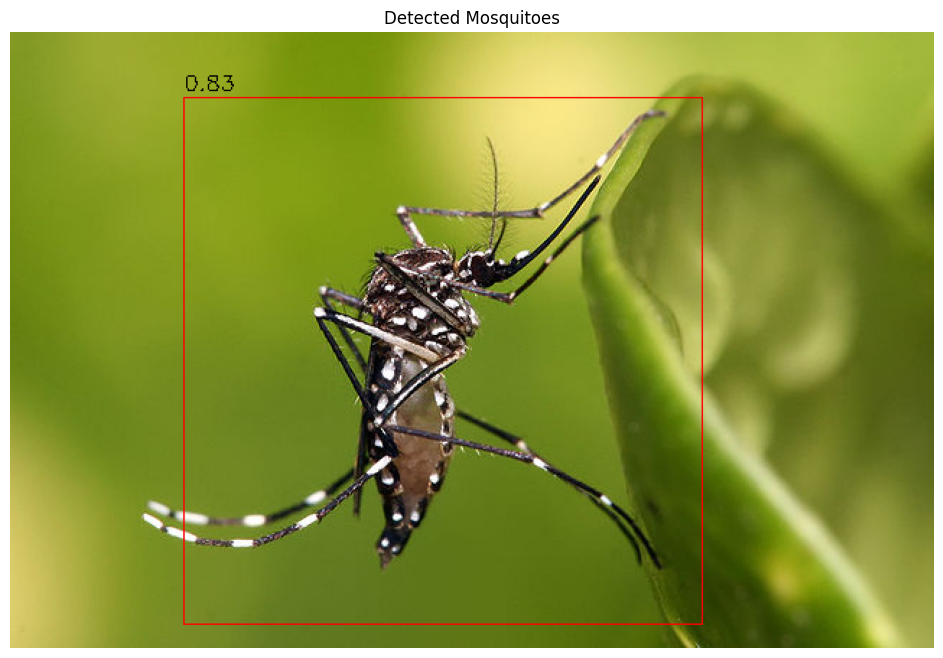


Detection Results:
Mosquito 1: Confidence = 0.83, Box = (x=299.6, y=227.9, w=359.2, h=365.3)


In [9]:
# Load test image
image_path = str(Path("test_img") / "640px-Aedes_aegypti.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run detection
detections = detector.predict(image)

# Draw detections
annotated_image = detector.visualize(image, detections)

# Display results
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Detected Mosquitoes")
plt.show()

# Print detection results
print("\nDetection Results:")
for i, (x, y, w, h, conf) in enumerate(detections):
    print(f"Mosquito {i+1}: Confidence = {conf:.2f}, Box = (x={x:.1f}, y={y:.1f}, w={w:.1f}, h={h:.1f})")